In [1]:
import pysm3

from fgbuster import (CMB, Dust, Synchrotron,
                      basic_comp_sep,get_sky,
                      get_observation, get_instrument)

import healpy as hp
import numpy as np
from fgbuster import xForecast, CMB, Dust, Synchrotron

In [2]:
nside = 64

sky = get_sky(nside, 'd1s1')
instrument = get_instrument('LiteBIRD')
freq_maps = get_observation(instrument, sky)

In [3]:
# I, Q, U maps
I_map = freq_maps[:,0]
Q_map = freq_maps[:,1]
U_map = freq_maps[:,2]

np.shape(I_map)
# sono mappe 1d con 15 frequenze ciascuna

(15, 49152)

In [4]:
# create 3% circular sky mask
RA  = 2*np.pi-70.*np.pi/180
DEC = np.pi/2+70.*np.pi/180

radius = 34*np.pi/180

mask_circular = np.zeros(12*nside**2)

for ipix in range(12*nside**2):
    theta, phi = hp.pix2ang(nside, ipix)
    if (((phi - RA)**2 + (theta - DEC)**2 <= radius**2)):
        mask_circular[ipix] = 1.0
    if (((phi - RA+2*np.pi)**2 + (theta - DEC)**2 <= radius**2)):
        mask_circular[ipix] = 1.0

# applying mask to observed frequency maps
freq_maps[...,mask_circular==0] = 0.0

In [5]:
RA, DEC, radius

(5.061454830783555, 2.792526803190927, 0.5934119456780721)

In [6]:
np.shape(freq_maps)
# 15 freq, I Q U, pixels

(15, 3, 49152)

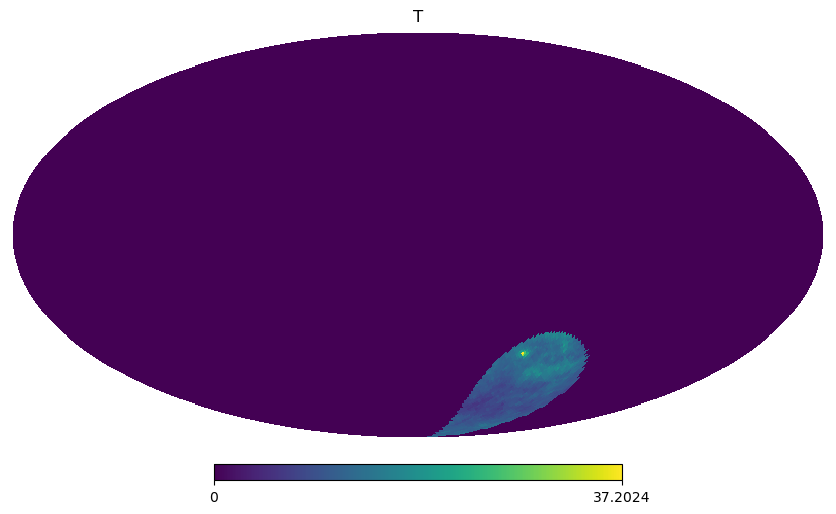

In [7]:
# ne plotto una per vederla
hp.mollview(freq_maps[0, 0, :], title='T')

### Component separation

In [8]:
components = [CMB(), Dust(350.), Synchrotron(20.)]

result = basic_comp_sep(components, instrument, freq_maps)
np.shape(result.s)
# sono 3 mappe I, Q e U per cmb, dust e sync. ma non so quali
# credo siano nello stesso ordine dell'input, quindi I, Q, U ma in un esempio chiama result.s[0,0] come Q della cmb, ma dovrebbe essere la I...

(3, 3, 49152)

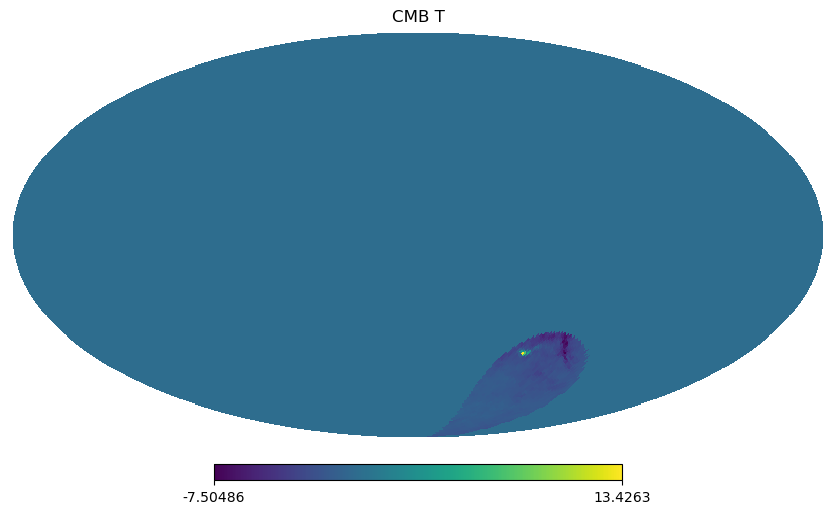

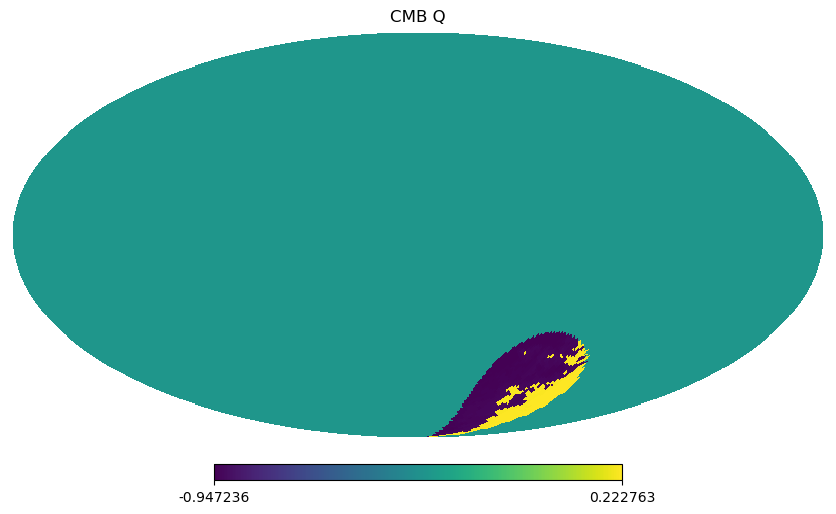

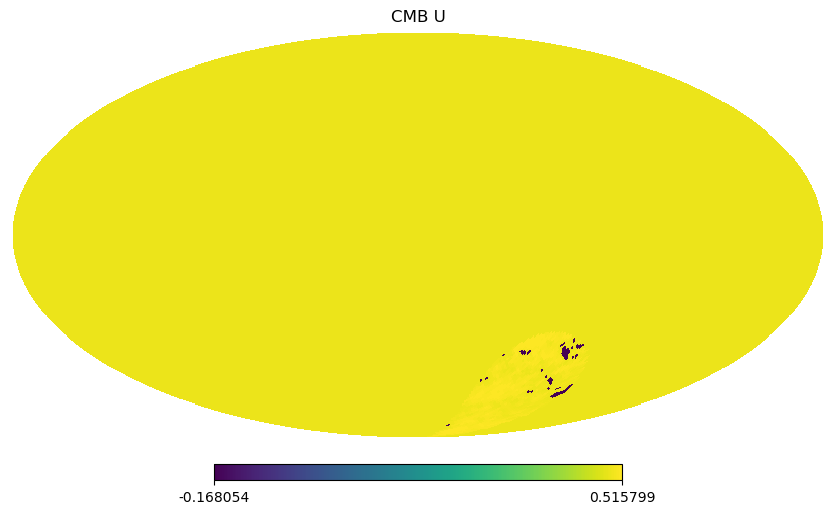

In [9]:
I_cmb = result.s[0,0] 
Q_cmb = result.s[0,1]
U_cmb = result.s[0,2]

hp.mollview(I_cmb, title='CMB T')
hp.mollview(Q_cmb, title='CMB Q', norm='hist')
hp.mollview(U_cmb, title='CMB U', norm='hist')

### Forecasting

fsky =  0.030192057291666668
======= ESTIMATION OF SPECTRAL PARAMETERS =======
res.x =  [ 1.49719443 23.5038402  -2.94165289]
======= ESTIMATION OF NOISE AFTER COMP SEP =======
======= COMPUTATION OF CL_FGS =======
======= ESTIMATION OF STAT AND SYS RESIDUALS =======
======= OPTIMIZATION OF COSMO LIKELIHOOD =======
bounds on r =  0.02073162127401229  /  0.02171067602537265
starting point =  0.0212155017136245
    ===>> fitted r =  [0.02130253]
======= ESTIMATION OF SIGMA(R) =======
ind_sr_min =  0
sr_grid[ind_sr_min-1] =  [1.]
sr_grid[ind_sr_min+1] =  [0.02500805]
sr_grid =  [[0.02130253]
 [0.02500805]
 [0.02935815]
 [0.03446492]
 [0.04046001]
 [0.04749793]
 [0.05576008]
 [0.06545941]
 [0.07684592]
 [0.09021308]
 [0.10590543]
 [0.12432742]
 [0.14595387]
 [0.17134219]
 [0.20114674]
 [0.23613573]
 [0.27721097]
 [0.32543114]
 [0.38203909]
 [0.44849386]
 [0.52650828]
 [0.61809311]
 [0.7256089 ]
 [0.8518268 ]
 [1.        ]]
case # 1
bounds on sigma(r) =  [0.02130253]  /  [0.02500805]
starti

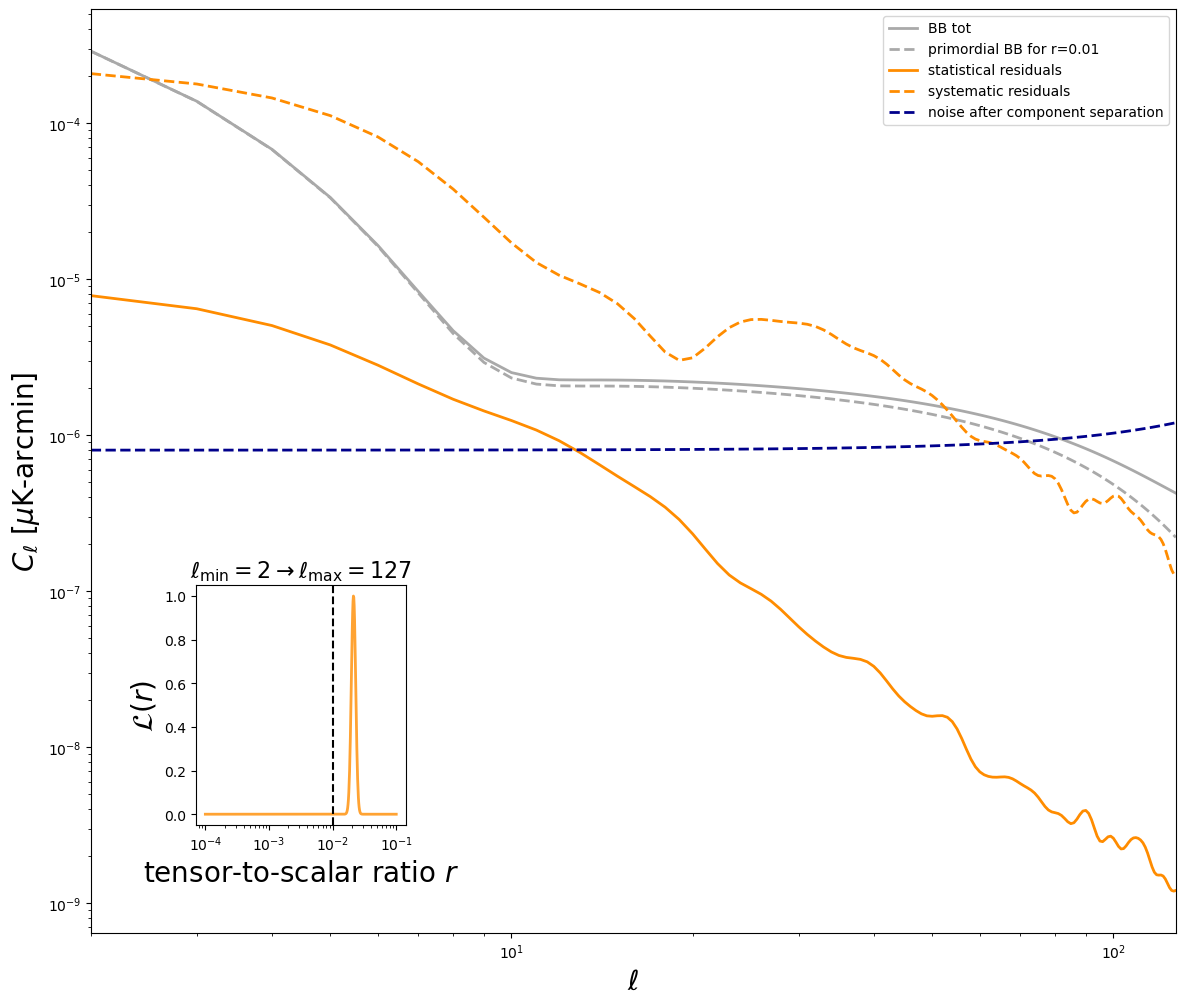

In [10]:
from fgbuster import xForecast, CMB, Dust, Synchrotron
res = xForecast(components, instrument, freq_maps, 2, 2*nside-1, Alens=0.1, r=0.01, make_figure=True)

# Uso UNSEEN

In [11]:
np.shape(freq_maps)

(15, 3, 49152)

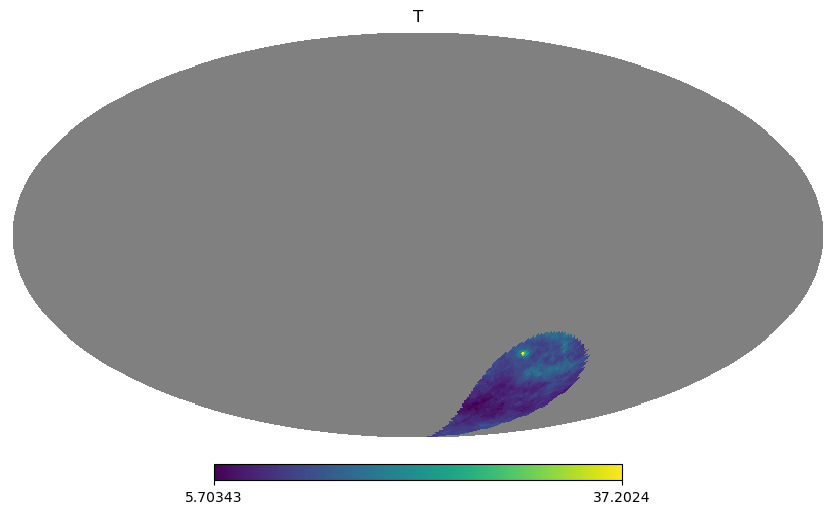

In [12]:
for i in range(15):
    for j in range (3):
        for p in range (49152):
            if freq_maps[i, j, p] == 0:
                freq_maps[i, j, p] = hp.UNSEEN

# ne plotto una a caso con UNSEEN
hp.mollview(freq_maps[0, 0, :], title='T')